<a href="https://colab.research.google.com/github/amanbagrecha/datascience_project/blob/master/ML_socialMediaAnalysis/dphi_Prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Age group of Social Media Application users
###  Part of cascade cup challenge 

The task at hand is to predict the age group of social media (app) users. Given the data of their users ranging from number of followers they have to hours they spend on the app, we are on the quest to solve what is the demography of the app.
[Dphi cascade cup challenge](https://dphi.tech/challenges/cascade-cup-data-science-hackathon/46/leaderboard/practice/) 

![](https://i.imgur.com/CA8fUhM.png)

## 1. Exploring the Trello Dataset

In [ ]:
# Data Description
# Term -> Description
# userId -> Unique number given to each user.
# tier -> Tier of the city in which the user is residing.
# gender -> Categorical feature representing the gender of the user. 1 represents male and 2 represents female.
# following_rate -> Number of accounts followed by the user(feature is normalized)
# followers_avg_age -> Average of age groups of all the followers of the user.
# following_avg_age -> Average of age groups of all the accounts followed by the user.
# max_repetitive_punc -> Maximum repititive punctuations found in the bio and comments of the user.
# num_of_hashtags_per_action -> Average nubmer of hashtags used by the user per comment.
# emoji_count_per_action -> Average number of emojis used by the user per comment.
# punctuations_per_action -> Average number of punctuations used by the user per comment.
# number_of_words_per_action -> Average number of words used by the user per comment.
# avgCompletion -> Average watch time completion rate of the videos.
# avgTimeSpent -> Average time spent by the user on a video in seconds.
# avgDuration -> Average duration of the videos that the user has watched till date.
# avgComments -> Average number of comments per video watched.
# creations -> Total number of videos uploaded by the user.
# content_views -> Total number of videos watched.
# num_of_comments -> Total number of comments made by the user (normalized)
# weekends_trails_watched_per_day -> Number of videos watched on weekends per day.
# weekdays_trails_watched_per_day -> Number of videos watched on weekdays per day.
# slot1_trails_watched_per_day -> The day is divided into 4 slots. This feature represents the average number of videos watched in this particular time slot.
# slot2_trails_watched_per_day -> The day is divided into 4 slots. This feature represents the average number of videos watched in this particular time slot.
# slot3_trails_watched_per_day -> The day is divided into 4 slots. This feature represents the average number of videos watched in this particular time slot.
# slot4_trails_watched_per_day -> data
# avgt2 -> Average number of followers of all the accounts followed by the user.
# age_group -> This is a categorical feature denoting the age of the user. Age of users is divided into 4 groups, 1: <18y; 2: 18-24y; 3: 24-30y; 4: >30y

In [ ]:
# import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random
import xgboost as xgb
from sklearn.model_selection import (cross_val_score, train_test_split, GridSearchCV)
from sklearn.metrics import accuracy_score
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, StackingClassifier, AdaBoostClassifier, GradientBoostingClassifier)
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# read the train dataset
train_df = pd.read_csv("train_age_dataset.csv")
test_df = pd.read_csv('test_age_dataset.csv')
train_df.head()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,265153,48958844,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,0.0,1
1,405231,51100441,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,82.5,2
2,57867,6887426,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,0.0,1
3,272618,50742404,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,0.0,1
4,251123,45589200,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,0.0,1


### About the Dataset

```
1. The shape of the Dataset (train) is (488877, 27) and (54320, 26) in test.
2. The different features of this dataset are mainly classified into two main categories :
    - Categorical Features - tier, gender, 
    - Numerical Features - Rest of the features
    - Target Variable - “age_group”
```

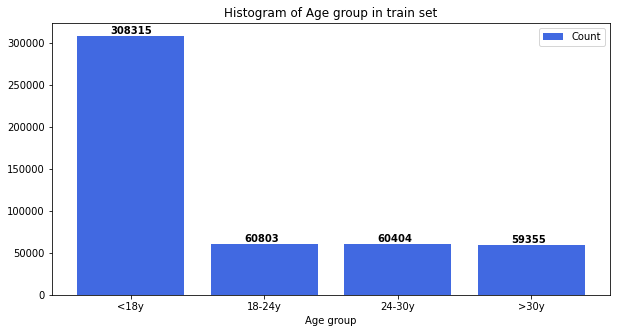

In [ ]:
# analysing target variable

def barlabels(bars,c='black'):
    for bar in bars:
        yval = round(bar.get_height(),2)
        plt.text(bar.get_x()+0.25,yval, yval,verticalalignment='bottom',color=c,fontweight='bold')
plt.figure(figsize=(10,5))

bars=plt.bar(x=np.arange(4),height=train_df.age_group.value_counts(),label='Count', color='royalblue')
plt.xlabel('Age group')
plt.xticks(np.arange(4),['<18y','18-24y','24-30y','>30y'])
plt.title('Histogram of Age group in train set')
plt.legend()
barlabels(bars, 'k')
plt.show()

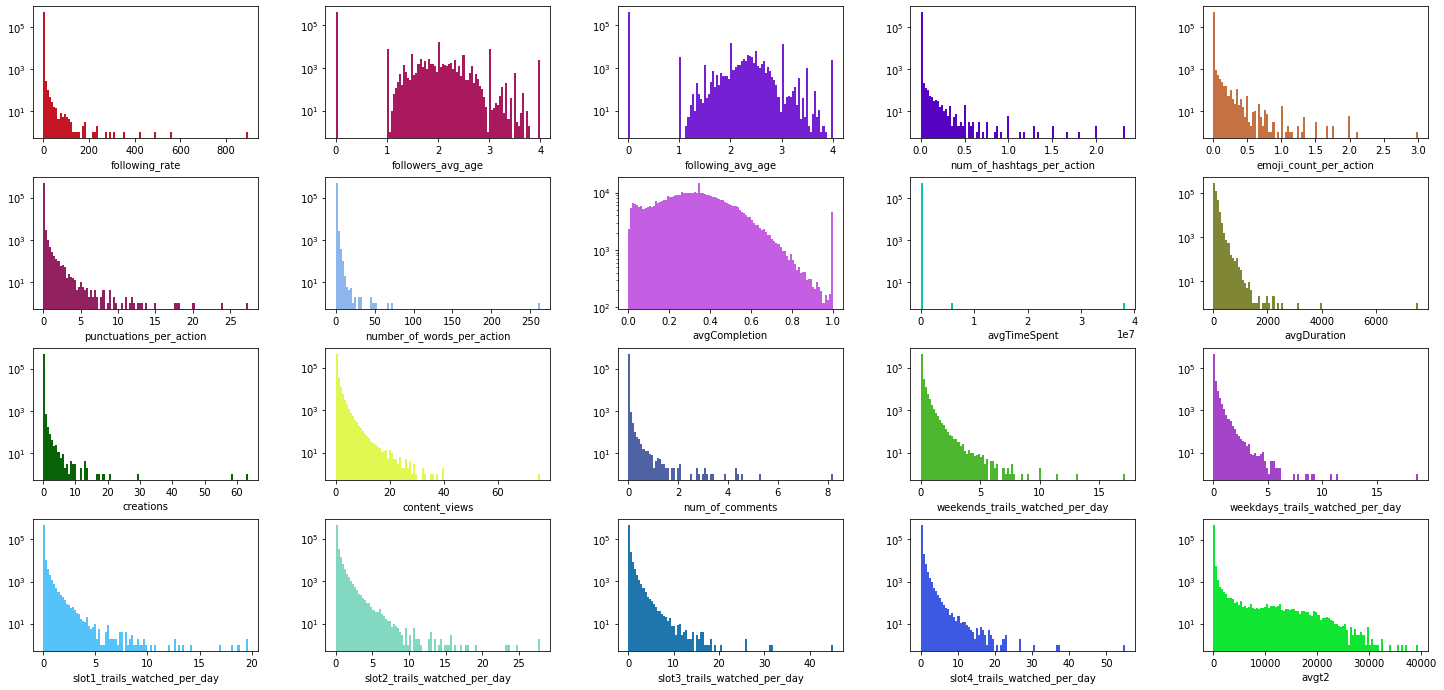

In [ ]:
# plot histograms for feature
fig = plt.figure(figsize = (25,15))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# generate random colors
random.seed(41)
colors_ = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))

# select only float64 columns
columns_flt64 = df.select_dtypes(include=['float64']).columns
colors = colors_(20)
for i,(j,color) in enumerate(zip(columns_flt64, colors)):
    plt.subplot(5, 5, i+1)
    plt.hist(df.loc[:,j],  log= True, bins=100, density=False, color = color)
    plt.xlabel(j)

### *Inference*
- Classes are inbalanced
- Most distribution are unimodel and have strong positive skewness.


## Preprocessing and data cleaning

In [ ]:

train_df = pd.read_csv('train_age_dataset.csv')
test_df = pd.read_csv('test_age_dataset.csv')

train_df = pd.get_dummies(train_df, columns=['tier'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['tier'], drop_first=True)

train_df['age_group'] = train_df['age_group']-1 # xgboost requries for labels to start from 0

feature_cols = [col for col in train_df.columns.tolist() if col not in ['age_group','num_of_hashtags_per_action', 'Unnamed: 0',
                                                                     'avgDuration','avgCompletion', 'avgComments',
                                                                       'tier_3', 'gender' ]]
target_cols = ['age_group']


In [ ]:
# Training and Validation Datasets
X_train, X_test, y_train, y_test = train_test_split(train_df[feature_cols], train_df[target_cols], test_size=0.3, random_state = 42, stratify=train_df[target_cols])

## Hyperparameter tuning

In [ ]:
# searching for best params via gridsearch  

## Create hyperparameter options for random forest
param_grid_rf = {
    'max_depth': [60,80, 120 ],#100, 110
    'max_features': [3, 5,9],
    'min_samples_leaf': [5, 25],
    'min_samples_split': [10, 20],
    'n_estimators': [300,500, 1000]
}

hyperparameters_rf = param_grid_rf
gridsearch_rf = GridSearchCV(RandomForestClassifier(), hyperparameters_rf, cv=5, n_jobs=-1, verbose=2)

In [ ]:
# searching for best params via gridsearch

## create hyperparameter options for gradient boosting
param_grid_gb = {
    'n_estimators': [300, 400,500],
     'max_features': [0.2, 0.4,
    'max_depth': [5, 7, 9],
    'min_samples_leaf': [2,4,6],
    'verbose': 2
}
                      
hyperparameters_gb = param_grid_gb
gridsearch_gb = GridSearchCV(GradientBoostingClassifier(), hyperparameters_gb, cv=5, n_jobs=-1, verbose=2)                     

## Defining and training the Model (Random Forest)

In [ ]:
# define fit function to fit and predict the results on the validation set
def fit_model(model, X_train, X_test, y_train, y_test):
    """Fit model and display results"""

    print("Fitting the model...")
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    score_ = accuracy_score(y_test, predicted)
    print("Accuracy of the model is: " , score_)

In [ ]:
# Training a Random forest with best hyperparams
rf_params = {'bootstrap': True,
 'max_depth': 150, 
 'max_features': 'sqrt', 
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 300} 
rf_model = RandomForestClassifier(**rf_params, random_state=42 )
fit_model(rf_model, X_train, X_test, y_train.values, y_test.values)

Fitting the model...
Accuracy of the model is:  0.7671889488899798


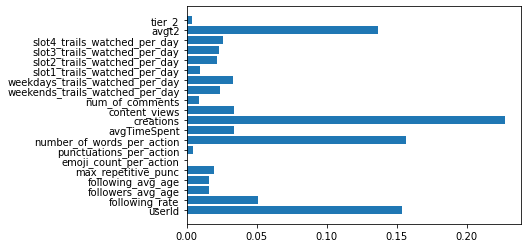

In [ ]:
_ = plt.barh( train_df[feature_cols].columns, rf_model.feature_importances_,)

## Defining and training the Model (xgboost)

In [ ]:
# Training a gradient with best hyperparams
# xg boost
xgb_params = {
    'n_estimators': 500,
    'max_depth': 8,
    'reg_alpha': 0.7,
    'verbosity':0
}
xgb_model = xgb.XGBClassifier(**xgb_params, random_state=42)
fit_model(xgb_model, X_train, X_test, y_train, y_test)

Fitting the model...
Accuracy of the model is:  0.8104988272514045


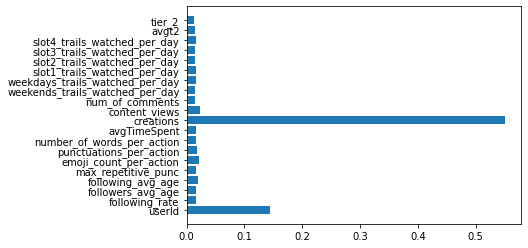

In [ ]:
_ = plt.barh( train_df[feature_cols].columns, xgb_model.feature_importances_ )


## Stacking Layers
- Different models learn different features and combining them can avoid potential errors by introducing majority voting mechanism.

- We create a 2 layer stack with 2 tree-based models for 1st layer and meta-learner as logistic regression

In [ ]:
# Put in our parameters for said classifiers

## Random Forest parameters
rf_params = {'bootstrap': True,
             'max_depth': 150,
             'n_jobs': -1,
             'max_features': 'sqrt', 
             'min_samples_leaf': 5,
             'min_samples_split': 10,
             'n_estimators': 300} 

# xg boost
xgb_params = {
    'n_estimators': 500,
    'max_depth': 8,
    'reg_alpha': 0.7,
    'verbosity':0
}

In [ ]:
# define the base models
level0 = list()

# create two models
level0.append(('rf', RandomForestClassifier(**rf_params)))
level0.append(('gb', xgb.XGBClassifier(**xgb_params)))

level1 = xgb.XGBClassifier(**xgb_params)
# define the stacking ensemble
stacked_model = StackingClassifier(estimators=level0, final_estimator = level1,n_jobs = -1, cv=3)
# fit the model on all available data
fit_model(stacked_model, X_train, X_test, y_train,y_test )

Fitting the model...
Accuracy of the model is:  0.8060464735722468


In [ ]:
xyz = train_df[feature_cols].corr()
xyz.style.background_gradient(cmap='Blues')

,userId,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgTimeSpent,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,tier_2
userId,1.000000,-0.001291,-0.193482,-0.209797,-0.052181,-0.008383,-0.026391,-0.197195,-0.003099,-0.004797,0.172518,-0.007649,0.108805,0.141520,0.054879,0.127023,0.121927,0.105013,-0.196902,0.227424
following_rate,-0.001291,1.000000,0.064708,0.060746,0.042046,-0.000094,0.000437,0.013535,-0.000041,0.068423,0.068105,0.097322,0.069426,0.078755,0.037387,0.067126,0.066273,0.067535,0.000386,-0.020512
followers_avg_age,-0.193482,0.064708,1.000000,0.939639,0.172344,0.002966,0.012342,0.123145,0.003228,0.096660,0.132141,0.091373,0.142942,0.149755,0.090253,0.124700,0.128054,0.130733,0.105896,-0.145978
following_avg_age,-0.209797,0.060746,0.939639,1.000000,0.165079,0.003194,0.012671,0.124643,0.003133,0.089465,0.116855,0.086352,0.129871,0.133434,0.082049,0.111925,0.114027,0.117371,0.108857,-0.146579
max_repetitive_punc,-0.052181,0.042046,0.172344,0.165079,1.000000,0.036628,0.107544,0.113900,0.001450,0.128265,0.104363,0.134459,0.124927,0.132210,0.076631,0.109411,0.117538,0.112034,0.015238,-0.088119
emoji_count_per_action,-0.008383,-0.000094,0.002966,0.003194,0.036628,1.000000,0.268548,0.091448,-0.000078,-0.000131,-0.014948,-0.001184,-0.010307,-0.012633,-0.004726,-0.011646,-0.010229,-0.010284,0.000373,-0.006230
punctuations_per_action,-0.026391,0.000437,0.012342,0.012671,0.107544,0.268548,1.000000,0.178658,-0.000129,0.000455,-0.025064,-0.001434,-0.017546,-0.020994,-0.007591,-0.019514,-0.017457,-0.017003,0.006542,-0.014276
number_of_words_per_action,-0.197195,0.013535,0.123145,0.124643,0.113900,0.091448,0.178658,1.000000,0.000413,0.090804,-0.051387,0.105880,-0.023800,-0.028933,-0.000539,-0.032751,-0.022979,-0.023218,0.112689,-0.087277
avgTimeSpent,-0.003099,-0.000041,0.003228,0.003133,0.001450,-0.000078,-0.000129,0.000413,1.000000,-0.000058,-0.000350,-0.000045,-0.000224,-0.000294,-0.000273,-0.000172,-0.000061,-0.000402,0.002329,-0.002890
creations,-0.004797,0.068423,0.096660,0.089465,0.128265,-0.000131,0.000455,0.090804,-0.000058,1.000000,0.144278,0.102262,0.155203,0.182848,0.114074,0.140588,0.158652,0.149182,0.005557,-0.046516


## Conclusions

This analysis on users of social media app displays a baseline model as well as goes into stacking with 2 layers in total. Hyperparamter tuning was performed and found the most effective paramters from the tuning was used to perform the model selection. We find that stacking model does not improve the model performance relative to the baseline xgboost model. 